In [297]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Data Preprocessing
colspecs = [[1,3], [5,7], [11,17], [20,23], [26,33], [36,37], [40,45], [48,54],
                  [57,58], [61,66], [69,75]]
Air_data = pd.read_fwf('airq402.dat',
                      colspecs= colspecs,
                      names=['City1', 'City2', 'Average Fare', 'Distance', 'Average weekly passengers', 'market leading airline', 
                             'market share','Average fare', 'Low price airline', 'market share', 'price'])
Air_data.head(5)

C:\Users\HP\Anaconda\lib\site-packages\pandas\io\parsers.py:710: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,AK,TL,114.47,528,424.56,L,70.19,111.03,L,70.19,111.03
1,AK,CO,122.47,860,276.84,L,75.10,123.09,L,17.23,118.94
2,LB,TL,214.42,852,215.76,L,78.89,223.98,O,2.77,167.12
3,LB,WI,69.40,288,606.84,N,96.97,68.86,N,96.97,68.86
4,LB,RD,158.13,723,313.04,A,39.79,161.36,N,15.34,145.42


In [31]:
Air_data_dummies = pd.get_dummies( Air_data, columns = ['City1','City2','market leading airline','Low price airline'] )

In [39]:
Air_data_dummies.dropna().head(2)

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price,City1_AD,City1_AE,City1_AH,...,Low price airline_L,Low price airline_N,Low price airline_O,Low price airline_P,Low price airline_Q,Low price airline_S,Low price airline_W,Low price airline_X,Low price airline_Y,Low price airline_Z
0,114.47,528,424.56,70.19,111.03,70.19,111.03,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,122.47,860,276.84,75.10,123.09,17.23,118.94,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
#Dropping NAN values in the datasets
winered_data = pd.read_csv('winequality-red.csv', delimiter = ';')
winewhite_data = pd.read_csv('winequality-white.csv', delimiter = ';')
winewhite_data.dropna().head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [29]:
winered_data.dropna().head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [172]:
#Splitting Dataset
def split_DataSet(Dataset, size):
        msk = np.random.rand(len(Dataset))<size
        Data_train = Dataset[msk]
        Data_test = Dataset[~msk]
        return Data_train,Data_test
#convert any non-numeric values to numeric values
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df
#For selecting right features
def correlation_Coefficient(A, B):
    A = A - np.mean(A)
    B = B - np.mean(B)
    return (np.sum((A * B))/((np.sqrt(np.sum(A * A))) * (np.sqrt(np.sum(B * B)))))
#For predicting linear regression line 
def Regression_Line(x, betas):
    x = np.insert(x, 0, 1, axis=1)
    yPrediction = np.dot(betas, x.T)
    return yPrediction
#For Error calculation 
def RMSE(y,y_pred):
    return np.sqrt(1.0 * np.mean((y - y_pred)**2))
#Minimising the loss by Gradient Descent
def learnlinregGD(x, y, xTest, yTest, alpha, beta , max_itr=1000, epsilon=1.1e-20, 
                  stepLengthController = None, stepLengthControllerParameters = None):
    x = np.insert(x, 0, 1, axis=1)
    x = x * 1.0
    y = y * 1.0
        
    plotX = []
    plotY_diff = []
    plotY_RMSE = []
    
    y_pred = np.dot(beta,x.T)
    residual = y_pred - y
    lossfunction = np.dot(residual.T, residual) 
    rmse = RMSE(yTest, Regression_Line(xTest, beta))
    plotY_RMSE.append(rmse)
    plotY_diff.append(lossfunction)
    plotX.append(0)
    
    for i in range(1, max_itr):
        
        gradient = np.dot(x.T, residual) * 2
        if stepLengthController != None:
            alpha = stepLengthController(lossfunction = lossfunction, alpha = alpha, x = x, y = y, 
                                         beta = beta, gradient = gradient, **stepLengthControllerParameters)
        beta = beta - (alpha * gradient)
        y_pred = np.dot(beta,x.T)
        residual = y_pred - y
        lossfunction_updated = np.dot(residual.T, residual)
        rmse = RMSE(yTest, Regression_Line(xTest, beta))
        plotY_RMSE.append(rmse)
        plotY_diff.append(abs(lossfunction - lossfunction_updated))
        plotX.append(i)
        if abs(lossfunction - lossfunction_updated) < epsilon:
            print("Converged in " + str(i) + " iterations")
            return beta, plotX, plotY_diff, plotY_RMSE, lossfunction, rmse
        lossfunction = lossfunction_updated        
    print("Algorithm does not converge in " + str(max_itr) + " interations")
    return beta, plotX, plotY_diff, plotY_RMSE, lossfunction, rmse
#Arijmo step length controller
def steplength_armijo(lossfunction, alpha, x, y, beta, gradient, delta, max_itr = 1000):    
    alpha = 1.0
    gradSquare = np.dot(gradient, gradient)    
    for i in range(0, max_itr):        
        alpha = alpha/2    
        residual = y - np.dot((beta - (alpha * gradient)), x .T)
        lossfunction_gradient = np.dot(residual.T, residual)
        if lossfunction_gradient < lossfunction - (alpha * delta * gradSquare):
            break;            
    return alpha
#Bold driver step length controller
def steplength_bolddriver(lossfunction, alpha, x, y, beta, gradient, max_itr = 1000,alphaMinus = 0.5, alphaPlus = 1.1):
    alpha = alpha * alphaPlus    
    for i in range(0, max_itr):        
        alpha = alpha * alphaMinus
        residual = y - np.dot((beta - (alpha * gradient)), x .T)
        lossfunction_gradient = np.dot(residual.T, residual)
        if lossfunction - lossfunction_gradient > 0:
            break;
    return alpha        

In [43]:
air=handle_non_numerical_data(Air_data)
air.head(5)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,63,33,114.47,528,424.56,8,70.19,111.03,10,70.19,111.03
1,63,72,122.47,860,276.84,8,75.10,123.09,10,17.23,118.94
2,26,33,214.42,852,215.76,8,78.89,223.98,5,2.77,167.12
3,26,27,69.40,288,606.84,2,96.97,68.86,3,96.97,68.86
4,26,23,158.13,723,313.04,3,39.79,161.36,3,15.34,145.42


In [47]:
for column in air:
    if column != "price":
        print("The corelation between " + column +" vs price is " + 
              str(correlationCoefficient(air[column], air['price'])))

The corelation between City1 vs price is 0.04216725451379426
The corelation between City2 vs price is -0.02359031295640774
The corelation between Average Fare vs price is 0.8664103374911549
The corelation between Distance vs price is 0.0936867813163194
The corelation between Average weekly passengers vs price is -0.14231354800543958
The corelation between market leading airline vs price is 0.0923315750323416
The corelation between market share vs price is -0.3076716283706642
The corelation between Average fare vs price is 0.8265105975217341
The corelation between Low price airline vs price is 0.10368176136490836
The corelation between market share.1 vs price is -0.24018595717542673


In [ ]:
"""""By looking at above correlation coefficient values, we can drop city1, city2, marketLeadingAirline,
lowPriceAirline as they do not have any corelation with price.

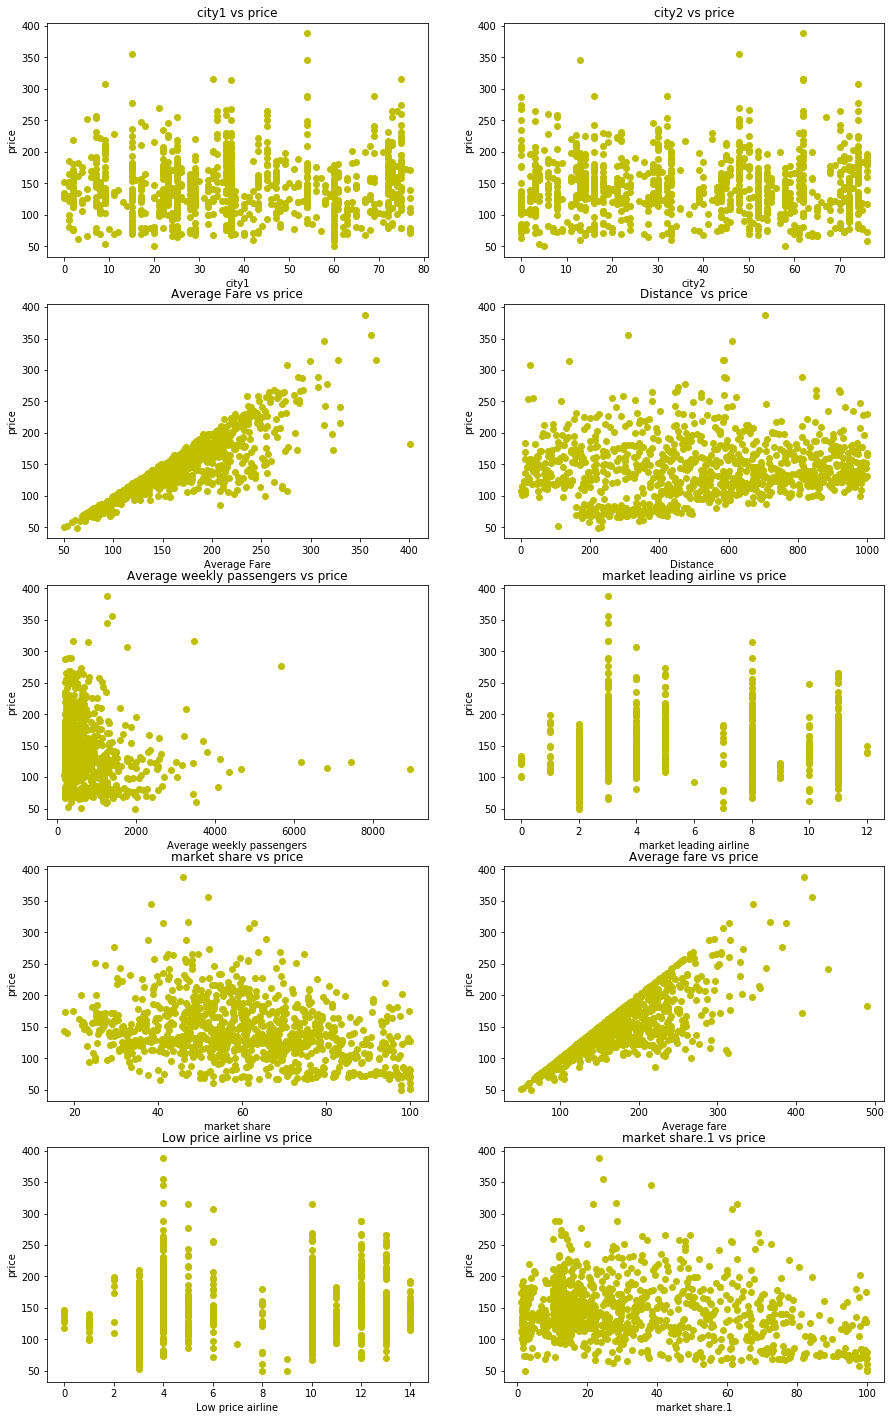

In [76]:
#plotting the relationship between the columns
figure, ((fig1, fig2), (fig3, fig4), (fig5, fig6), (fig7, fig8), (fig9, fig10))  = plt.subplots(5,2,figsize=(15, 25))

fig1.plot(air.City1 ,air.price,'yo')
fig1.set_title("city1 vs price")
fig1.set_xlabel("city1")
fig1.set_ylabel("price")

fig2.plot(air.City2 ,air.price,'yo')
fig2.set_title("city2 vs price")
fig2.set_xlabel("city2")
fig2.set_ylabel("price")

fig3.plot(air['Average Fare']  ,air.price,'yo')
fig3.set_title("Average Fare vs price")
fig3.set_xlabel("Average Fare")
fig3.set_ylabel("price")

fig4.plot(air.Distance  ,air.price,'yo')
fig4.set_title("Distance  vs price")
fig4.set_xlabel("Distance ")
fig4.set_ylabel("price")

fig5.plot(air['Average weekly passengers'] ,air.price,'yo')
fig5.set_title("Average weekly passengers vs price")
fig5.set_xlabel("Average weekly passengers")
fig5.set_ylabel("price")

fig6.plot(air['market leading airline'] ,air.price,'yo')
fig6.set_title("market leading airline vs price")
fig6.set_xlabel("market leading airline")
fig6.set_ylabel("price")

fig7.plot(air['market share'] ,air.price,'yo')
fig7.set_title("market share vs price")
fig7.set_xlabel("market share")
fig7.set_ylabel("price")

fig8.plot(air['Average fare'] ,air.price,'yo')
fig8.set_title("Average fare vs price")
fig8.set_xlabel("Average fare")
fig8.set_ylabel("price")

fig9.plot(air['Low price airline'] ,air.price,'yo')
fig9.set_title("Low price airline vs price")
fig9.set_xlabel("Low price airline")
fig9.set_ylabel("price")

fig10.plot(air['market share.1'] ,air.price,'yo')
fig10.set_title("market share.1 vs price")
fig10.set_xlabel("market share.1")
fig10.set_ylabel("price")


plt.show()

In [78]:
#selecting the required columns for air dataset
air = air[['Average Fare', 'Distance', 'Average weekly passengers', 'market share',
                           'Average fare', 'market share.1', 'price']]
air.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42


In [93]:
#splitting the data
trainSet, testSet = split_DataSet(air, 0.8)
print(trainSet.shape)
print(testSet.shape)

(800, 7)
(200, 7)


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


When alpha =0.1


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in multiply
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in subtract


Algorithm does not converge in 1000 interations
RMSE nan
When alpha =1.3e-09
Algorithm does not converge in 1000 interations
RMSE inf
When alpha =1.37e-11
Algorithm does not converge in 1000 interations
RMSE 25.7828447131188


C:\Users\HP\Anaconda\lib\site-packages\matplotlib\ticker.py:1910: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


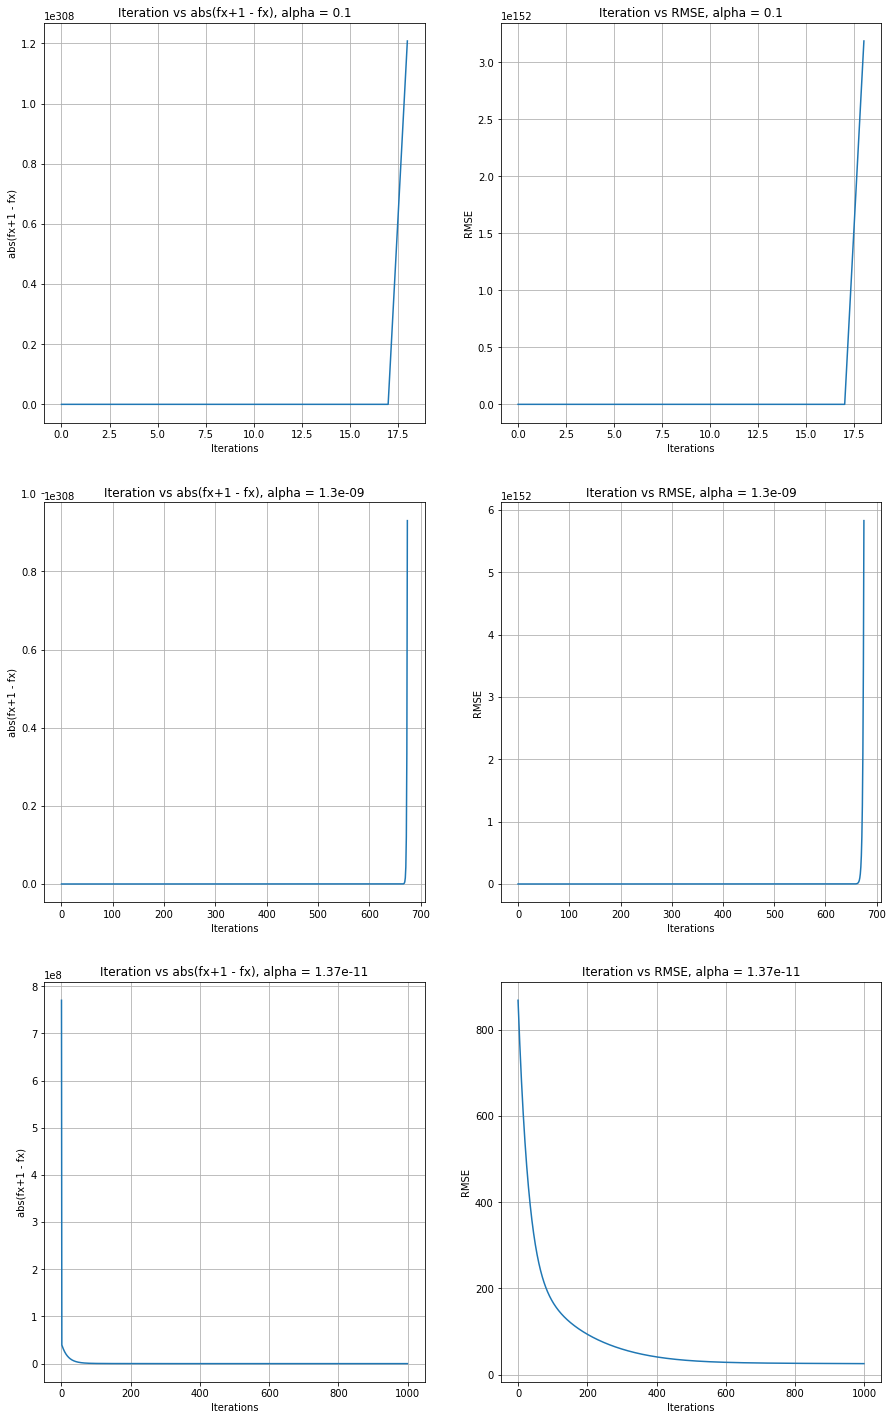

In [302]:
#Gradient descent with manual alpha values
X_train = trainSet.as_matrix(columns = ['Average Fare', 'Distance', 'Average weekly passengers', 'market share',
                           'Average fare', 'market share.1'])
X_test = testSet.as_matrix(columns = ['Average Fare', 'Distance', 'Average weekly passengers', 'market share',
                           'Average fare', 'market share.1'])
Y_train = trainSet['price']
Y_test = testSet['price']

np.random.seed(8)
inputBeta = np.random.random_sample(7)
alpha_parameterGrid = [0.1, 1.3e-9, 1.37e-11]
figure, ((fig1, fig2), (fig3, fig4), (fig5, fig6))  = plt.subplots(3,2,figsize=(15, 25))
axis = ((fig1, fig2), (fig3, fig4), (fig5, fig6))
index = 0

bestModelParameters = None
bestModelX = None
bestModelY = None
leastRMSE = None
leastRSS = None
for alpha in alpha_parameterGrid:
    print("When alpha ="+ str(alpha))
    
    betas, X, Ydiff, Yrmse, rss, rmse = learnlinregGD(X_train, Y_train, X_test, Y_test,
                                                                           alpha, inputBeta,
                                                                           max_itr = 1000)
    if not(np.isnan(rmse)):
        if leastRMSE is None or leastRMSE > rmse:
            leastRMSE = rmse
            bestModelParameters = betas
            leastRSS = rss
            bestModelX = X
            bestModelY = Yrmse
            
    print("RMSE "+ str(rmse))
    
    axis[index][0].plot(X, Ydiff)
    axis[index][0].grid()
    axis[index][0].set_title("Iteration vs abs(fx+1 - fx), alpha = " + str(alpha))
    axis[index][0].set_xlabel("Iterations")
    axis[index][0].set_ylabel("abs(fx+1 - fx)")
    
    axis[index][1].plot(X, Yrmse)
    axis[index][1].grid()
    axis[index][1].set_title("Iteration vs RMSE, alpha = " + str(alpha))
    axis[index][1].set_xlabel("Iterations")
    axis[index][1].set_ylabel("RMSE")
    
    index = index + 1
    
plt.show()
plt.close()

Algorithm does not converge in 1000 interations
RMSE 17.482570945840386


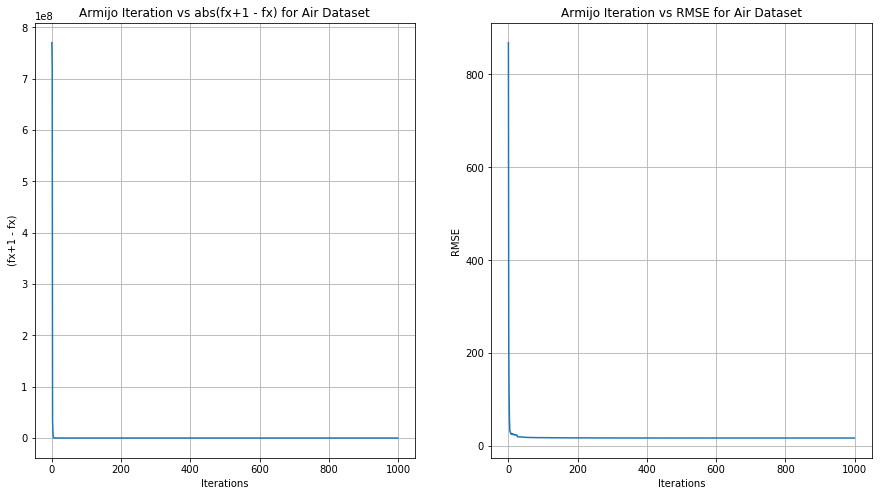

In [306]:
#Gradient descent with alpha values from ARMIJO step length controller
plt.close()
figure, ((fig1, fig2))  = plt.subplots(1,2,figsize=(15, 25))

betasArmijo, xArmijo, ydiffArmijo, yRMSEArmijo, rssArmijo, rmseArmijo = learnlinregGD(X_train, Y_train, 
                                            X_test, Y_test,
                                            None, inputBeta, max_itr = 1000,
                                            stepLengthController = steplength_armijo,
                                            stepLengthControllerParameters = {"delta":0.2})                    
                                            
                                                                        
figure.set_figheight(8)
print("RMSE "+ str(rmseArmijo))
fig1.plot(xArmijo, ydiffArmijo)
fig1.grid()
fig1.set_title("Armijo Iteration vs abs(fx+1 - fx) for Air Dataset")
fig1.set_xlabel("Iterations")
fig1.set_ylabel("(fx+1 - fx)")

fig2.plot(xArmijo, yRMSEArmijo)
fig2.grid()
fig2.set_title("Armijo Iteration vs RMSE for Air Dataset")
fig2.set_xlabel("Iterations")
fig2.set_ylabel("RMSE")
plt.show()

Algorithm does not converge in 1000 interations
RMSE 17.755737958852954


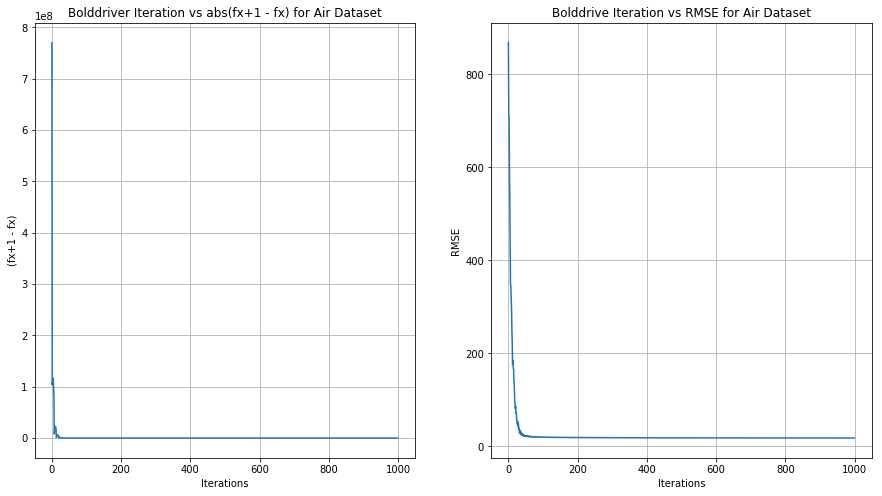

In [307]:
#Gradient descent with alpha values from Bold driver step length controller
figure, ((fig1, fig2))  = plt.subplots(1,2,figsize=(15, 25))


betasbd, xbd, ydiffbd, yRMSEbd, rssbd, rmsebd = learnlinregGD(X_train, Y_train, 
                                                        X_test, Y_test,
                                                        1.0, inputBeta, max_itr = 1000,
                                                        stepLengthController = steplength_bolddriver,
                                                        stepLengthControllerParameters = 
                                                        {"alphaMinus" : 0.9, "alphaPlus" : 1.5})
figure.set_figheight(8)
print("RMSE "+ str(rmsebd))
fig1.plot(xbd, ydiffbd)
fig1.grid()
fig1.set_title("Bolddriver Iteration vs abs(fx+1 - fx) for Air Dataset")
fig1.set_xlabel("Iterations")
fig1.set_ylabel("(fx+1 - fx)")

fig2.plot(xbd, yRMSEbd)
fig2.grid()
fig2.set_title("Bolddrive Iteration vs RMSE for Air Dataset")
fig2.set_xlabel("Iterations")
fig2.set_ylabel("RMSE")

plt.show()

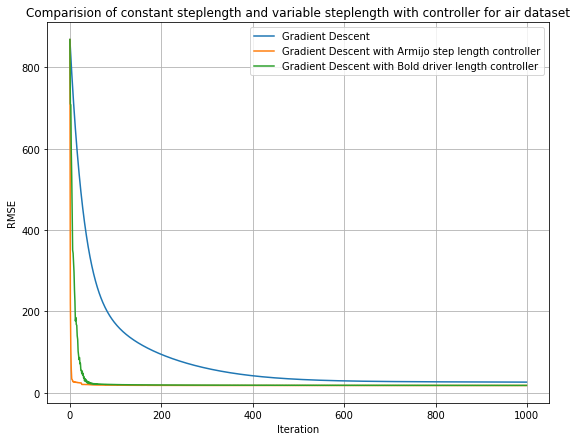

In [318]:
#Comparision of constant steplength and variable steplength with controller for air dataset
plt.close()
plt.figure(figsize=(9,7))
plt.plot(bestModelX, bestModelY, label = "Gradient Descent")
plt.plot(xArmijo, yRMSEArmijo, label = "Gradient Descent with Armijo step length controller")
plt.plot(xbd, yRMSEbd, label = "Gradient Descent with Bold driver length controller")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Comparision of constant steplength and variable steplength with controller for air dataset")
plt.legend()
plt.show()

In [299]:
#For Winered and winewhite dataset
#Selecting the features
for column in winered_data:
    if column != "quality":
        print("For winered dataset,The corelation between " + column +" vs quality is " + 
              str(correlationCoefficient(winered_data[column], winered_data['quality'])))

For winered dataset,The corelation between fixed acidity vs quality is 0.12405164911322432
For winered dataset,The corelation between volatile acidity vs quality is -0.39055778026400717
For winered dataset,The corelation between citric acid vs quality is 0.2263725143180414
For winered dataset,The corelation between residual sugar vs quality is 0.013731637340066275
For winered dataset,The corelation between chlorides vs quality is -0.1289065599300527
For winered dataset,The corelation between free sulfur dioxide vs quality is -0.05065605724427635
For winered dataset,The corelation between total sulfur dioxide vs quality is -0.18510028892653782
For winered dataset,The corelation between density vs quality is -0.17491922778335012
For winered dataset,The corelation between pH vs quality is -0.05773139120538214
For winered dataset,The corelation between sulphates vs quality is 0.2513970790692614
For winered dataset,The corelation between alcohol vs quality is 0.47616632400113607


In [204]:
winered_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

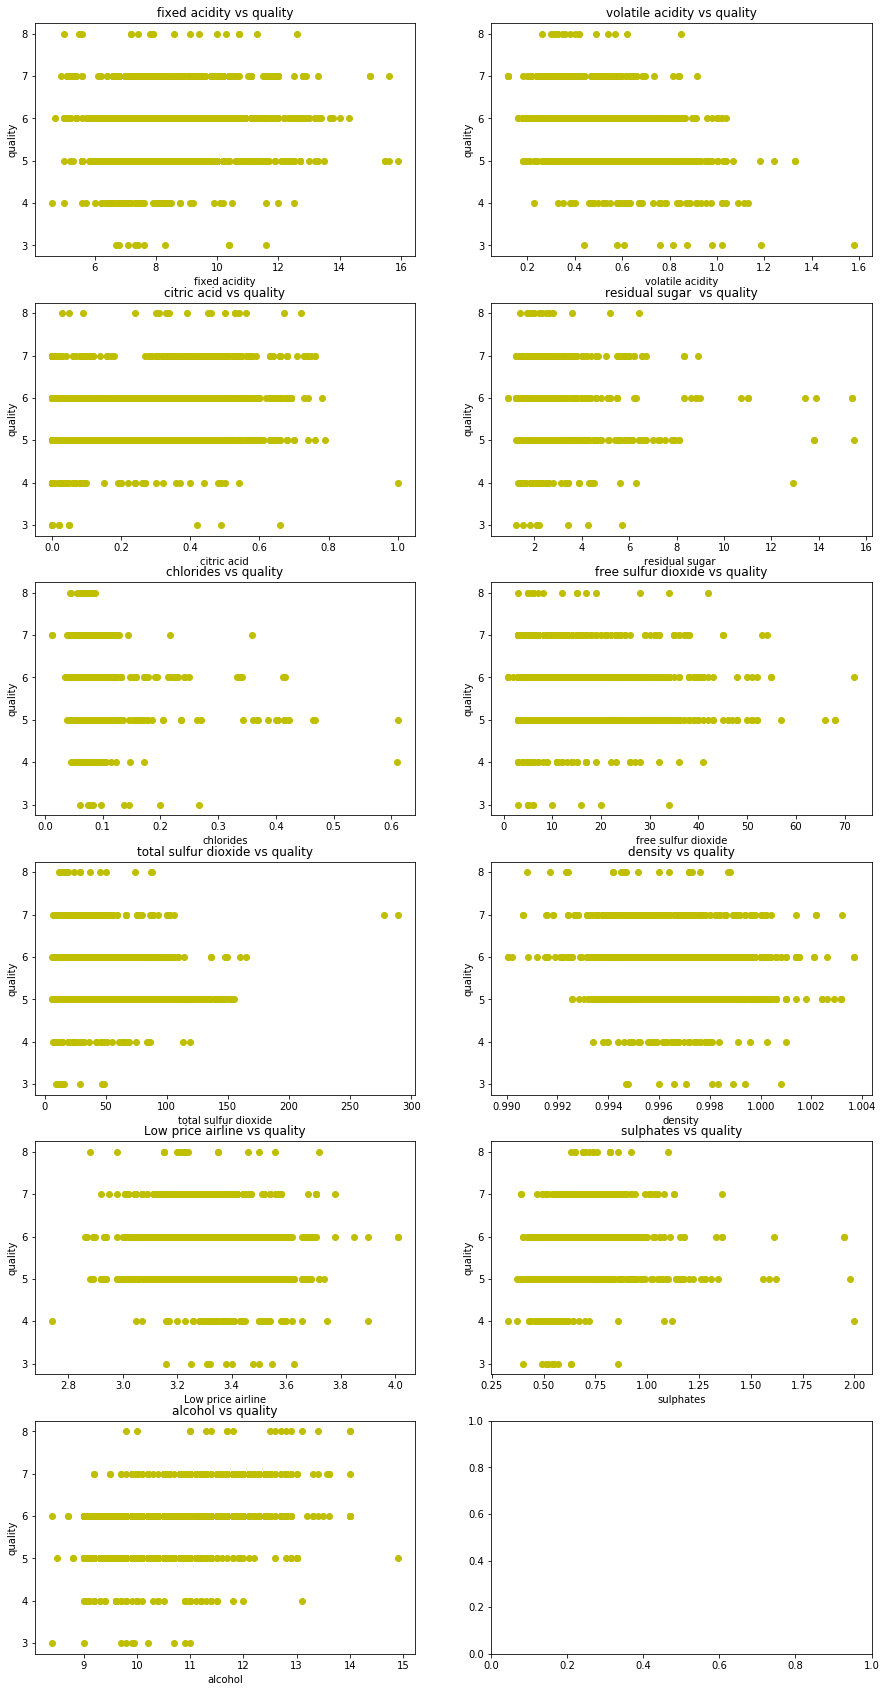

In [206]:
#Plotting the relationship between columns for wine red dataset
figure, ((fig1, fig2), (fig3, fig4), (fig5, fig6), (fig7, fig8), (fig9, fig10),(fig11, fig12))  = plt.subplots(6,2,figsize=(15, 30))

fig1.plot(winered_data['fixed acidity'] ,winered_data.quality,'yo')
fig1.set_title("fixed acidity vs quality")
fig1.set_xlabel("fixed acidity")
fig1.set_ylabel("quality")

fig2.plot(winered_data['volatile acidity'] ,winered_data.quality,'yo')
fig2.set_title("volatile acidity vs quality")
fig2.set_xlabel("volatile acidity")
fig2.set_ylabel("quality")

fig3.plot(winered_data['citric acid']  ,winered_data.quality,'yo')
fig3.set_title("citric acid vs quality")
fig3.set_xlabel("citric acid")
fig3.set_ylabel("quality")

fig4.plot(winered_data['residual sugar']  ,winered_data.quality,'yo')
fig4.set_title("residual sugar  vs quality")
fig4.set_xlabel("residual sugar ")
fig4.set_ylabel("quality")

fig5.plot(winered_data['chlorides'] ,winered_data.quality,'yo')
fig5.set_title("chlorides vs quality")
fig5.set_xlabel("chlorides")
fig5.set_ylabel("quality")

fig6.plot(winered_data['free sulfur dioxide'] ,winered_data.quality,'yo')
fig6.set_title("free sulfur dioxide vs quality")
fig6.set_xlabel("free sulfur dioxide")
fig6.set_ylabel("quality")

fig7.plot(winered_data['total sulfur dioxide'] ,winered_data.quality,'yo')
fig7.set_title("total sulfur dioxide vs quality")
fig7.set_xlabel("total sulfur dioxide")
fig7.set_ylabel("quality")

fig8.plot(winered_data['density'] ,winered_data.quality,'yo')
fig8.set_title("density vs quality")
fig8.set_xlabel("density")
fig8.set_ylabel("quality")

fig9.plot(winered_data['pH'] ,winered_data.quality,'yo')
fig9.set_title("Low price airline vs quality")
fig9.set_xlabel("Low price airline")
fig9.set_ylabel("quality")

fig10.plot(winered_data['sulphates'] ,winered_data.quality,'yo')
fig10.set_title("sulphates vs quality")
fig10.set_xlabel("sulphates")
fig10.set_ylabel("quality")

fig11.plot(winered_data['alcohol'] ,winered_data.quality,'yo')
fig11.set_title("alcohol vs quality")
fig11.set_xlabel("alcohol")
fig11.set_ylabel("quality")


plt.show()

In [300]:
#selecting features for wine white dataset
for column in winewhite_data:
    if column != "quality":
        print("For winewhite dataset,The corelation between " + column +" vs quality is " + 
              str(correlationCoefficient(winered_data[column], winered_data['quality'])))

For winewhite dataset,The corelation between fixed acidity vs quality is 0.12405164911322432
For winewhite dataset,The corelation between volatile acidity vs quality is -0.39055778026400717
For winewhite dataset,The corelation between citric acid vs quality is 0.2263725143180414
For winewhite dataset,The corelation between residual sugar vs quality is 0.013731637340066275
For winewhite dataset,The corelation between chlorides vs quality is -0.1289065599300527
For winewhite dataset,The corelation between free sulfur dioxide vs quality is -0.05065605724427635
For winewhite dataset,The corelation between total sulfur dioxide vs quality is -0.18510028892653782
For winewhite dataset,The corelation between density vs quality is -0.17491922778335012
For winewhite dataset,The corelation between pH vs quality is -0.05773139120538214
For winewhite dataset,The corelation between sulphates vs quality is 0.2513970790692614
For winewhite dataset,The corelation between alcohol vs quality is 0.4761663

In [208]:
winewhite_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

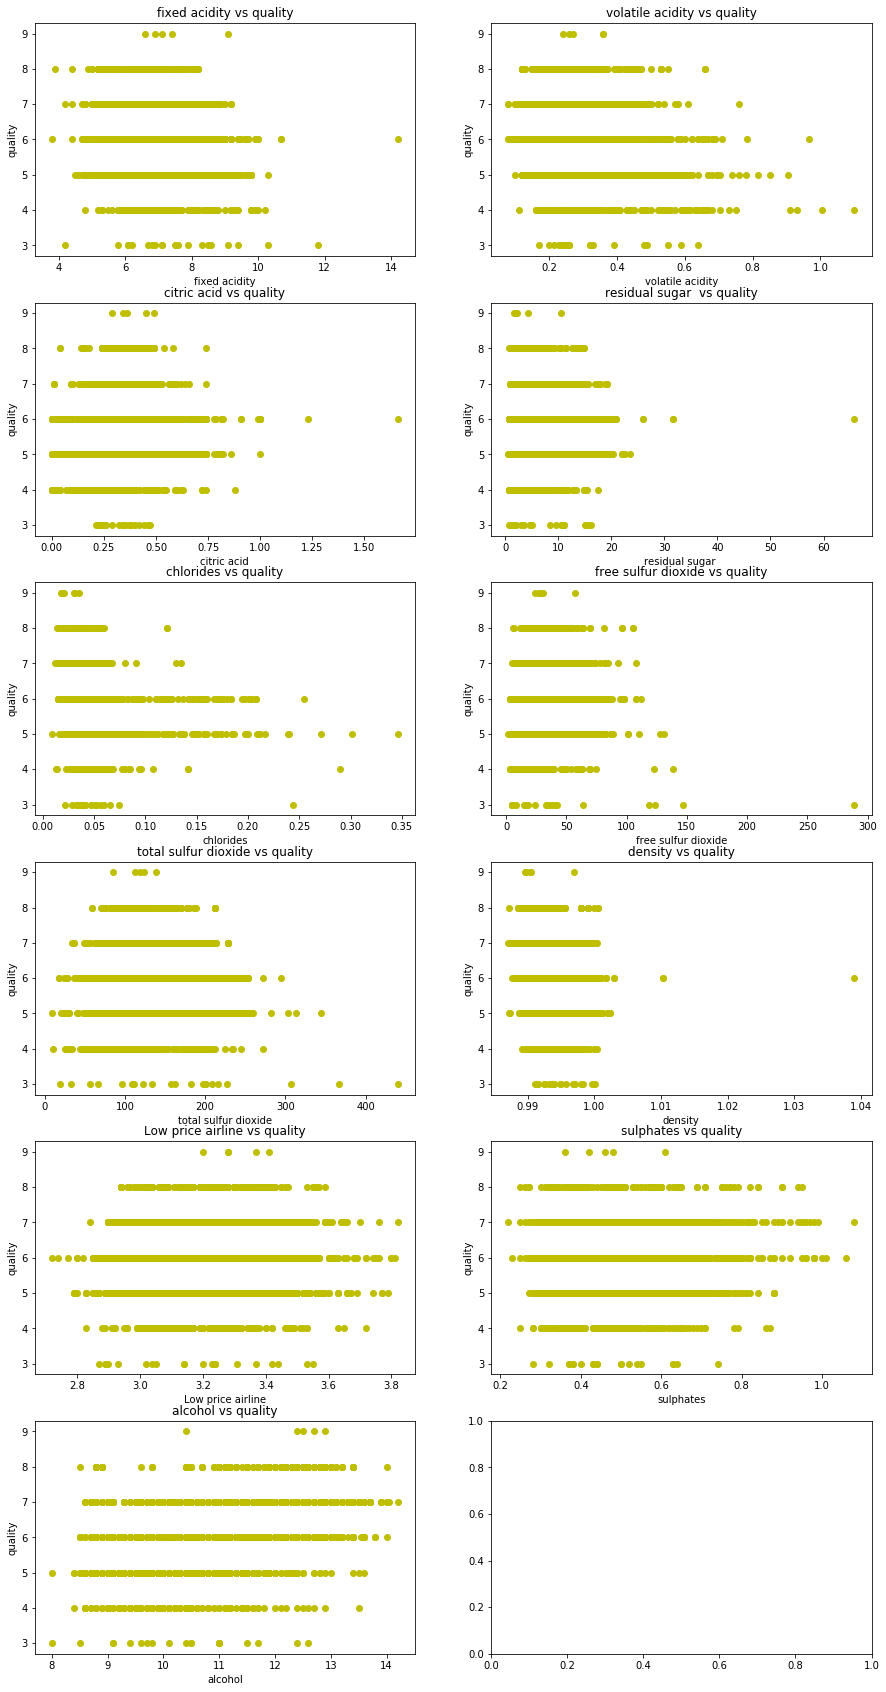

In [209]:
#Plotting the relationship between columns for wine white dataset
figure, ((fig1, fig2), (fig3, fig4), (fig5, fig6), (fig7, fig8), (fig9, fig10),(fig11, fig12))  = plt.subplots(6,2,figsize=(15, 30))
 
fig1.plot(winewhite_data['fixed acidity'] ,winewhite_data.quality,'yo')
fig1.set_title("fixed acidity vs quality")
fig1.set_xlabel("fixed acidity")
fig1.set_ylabel("quality")

fig2.plot(winewhite_data['volatile acidity'] ,winewhite_data.quality,'yo')
fig2.set_title("volatile acidity vs quality")
fig2.set_xlabel("volatile acidity")
fig2.set_ylabel("quality")

fig3.plot(winewhite_data['citric acid']  ,winewhite_data.quality,'yo')
fig3.set_title("citric acid vs quality")
fig3.set_xlabel("citric acid")
fig3.set_ylabel("quality")

fig4.plot(winewhite_data['residual sugar']  ,winewhite_data.quality,'yo')
fig4.set_title("residual sugar  vs quality")
fig4.set_xlabel("residual sugar ")
fig4.set_ylabel("quality")

fig5.plot(winewhite_data['chlorides'] ,winewhite_data.quality,'yo')
fig5.set_title("chlorides vs quality")
fig5.set_xlabel("chlorides")
fig5.set_ylabel("quality")

fig6.plot(winewhite_data['free sulfur dioxide'] ,winewhite_data.quality,'yo')
fig6.set_title("free sulfur dioxide vs quality")
fig6.set_xlabel("free sulfur dioxide")
fig6.set_ylabel("quality")

fig7.plot(winewhite_data['total sulfur dioxide'] ,winewhite_data.quality,'yo')
fig7.set_title("total sulfur dioxide vs quality")
fig7.set_xlabel("total sulfur dioxide")
fig7.set_ylabel("quality")

fig8.plot(winewhite_data['density'] ,winewhite_data.quality,'yo')
fig8.set_title("density vs quality")
fig8.set_xlabel("density")
fig8.set_ylabel("quality")

fig9.plot(winewhite_data['pH'] ,winewhite_data.quality,'yo')
fig9.set_title("Low price airline vs quality")
fig9.set_xlabel("Low price airline")
fig9.set_ylabel("quality")

fig10.plot(winewhite_data['sulphates'] ,winewhite_data.quality,'yo')
fig10.set_title("sulphates vs quality")
fig10.set_xlabel("sulphates")
fig10.set_ylabel("quality")

fig11.plot(winewhite_data['alcohol'] ,winewhite_data.quality,'yo')
fig11.set_title("alcohol vs quality")
fig11.set_xlabel("alcohol")
fig11.set_ylabel("quality")


plt.show()

In [ ]:
""""Selected features are volatile acidity, chlorides, density and alcohol in both datasets 

In [211]:
#Splitting the dataset
trainSet1, testSet1 = split_DataSet(winered_data, 0.8)
trainSet2, testSet2 = split_DataSet(winewhite_data, 0.8)
print(trainSet1.shape)
print(testSet1.shape)
print(trainSet2.shape)
print(testSet2.shape)

(1299, 12)
(300, 12)
(3982, 12)
(916, 12)


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


When alpha =0.1


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in subtract


Algorithm does not converge in 1000 interations
RMSE nan
When alpha =1.7e-05


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in multiply


Algorithm does not converge in 1000 interations
RMSE nan
When alpha =1.7e-11
Algorithm does not converge in 1000 interations
RMSE 1.4667118421940806


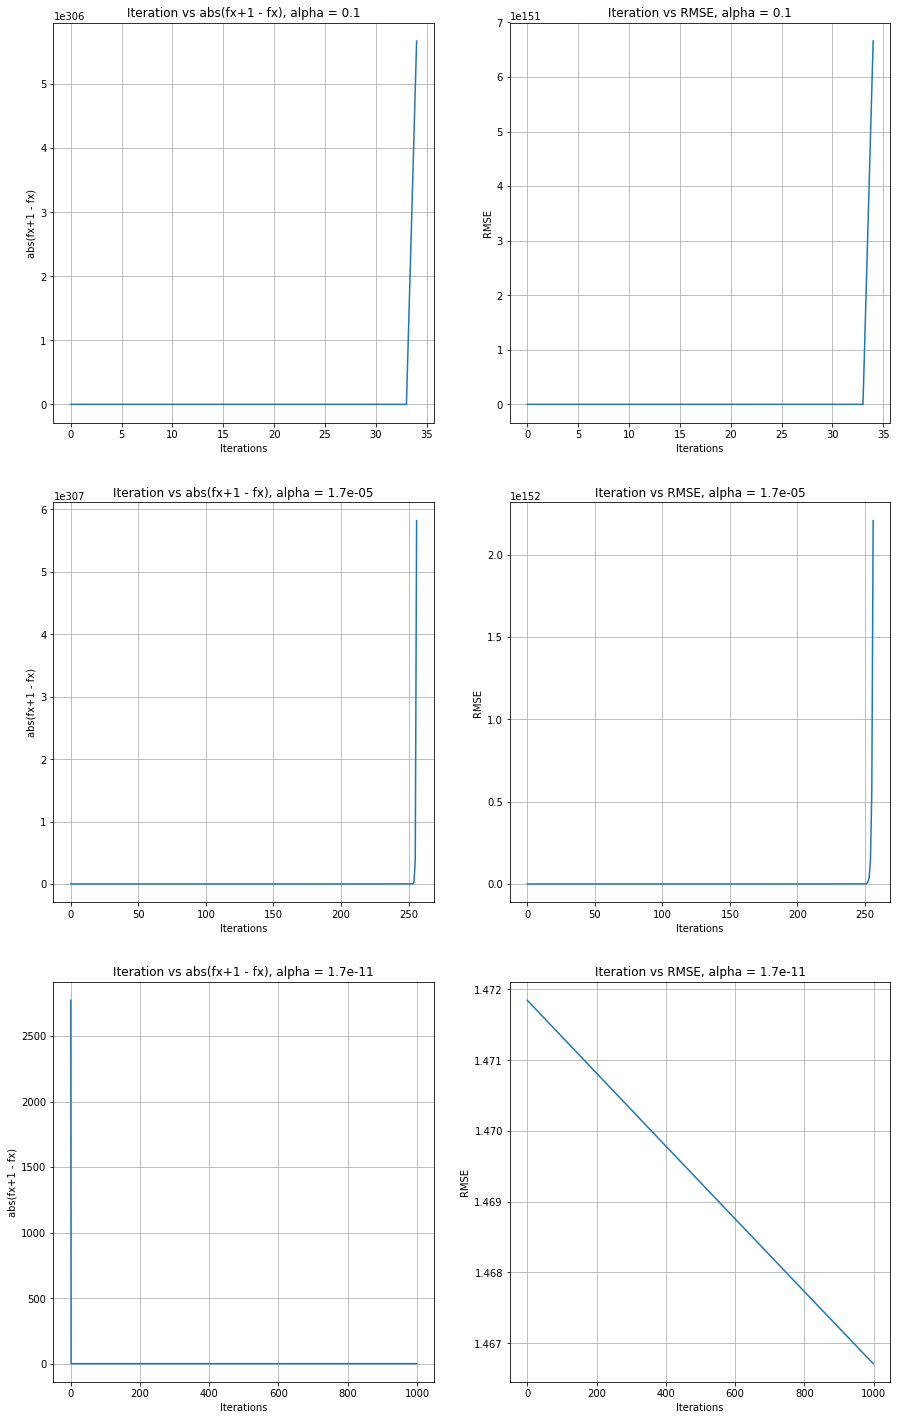

In [304]:
#Gradient descent with manual values for wine red dataset
X_train1 = trainSet1.as_matrix(columns = ['volatile acidity', 'chlorides', 'density', 'alcohol'])
X_test1 = testSet1.as_matrix(columns = ['volatile acidity', 'chlorides', 'density', 'alcohol'])
Y_train1 = trainSet1['quality']
Y_test1 = testSet1['quality']

np.random.seed(8)
inputBeta1 = np.random.random_sample(5)
alpha_parameterGrid1 = [0.1, 0.000017, 1.7e-11]
figure, ((fig1, fig2), (fig3, fig4), (fig5, fig6))  = plt.subplots(3,2,figsize=(15, 25))
axis1 = ((fig1, fig2), (fig3, fig4), (fig5, fig6))
index1 = 0

bestModelParameters1 = None
bestModelX1 = None
bestModelY1 = None
leastRMSE1 = None
leastRSS1 = None
for alpha in alpha_parameterGrid1:
    print("When alpha =" +str(alpha))
    
    betas1, X1, Ydiff1, Yrmse1, rss1, rmse1 = learnlinregGD(X_train1, Y_train1, X_test1, Y_test1,
                                                                           alpha, inputBeta1,
                                                                           max_itr = 1000)
    if not(np.isnan(rmse1)):
        if leastRMSE1 is None or leastRMSE1 > rmse1:
            leastRMSE1 = rmse1
            bestModelParameters1 = betas1
            leastRSS1 = rss1
            bestModelX1 = X1
            bestModelY1 = Yrmse1
            
    print("RMSE "+ str(rmse1))
    
    axis1[index1][0].plot(X1, Ydiff1)
    axis1[index1][0].grid()
    axis1[index1][0].set_title("Iteration vs abs(fx+1 - fx), alpha = " + str(alpha))
    axis1[index1][0].set_xlabel("Iterations")
    axis1[index1][0].set_ylabel("abs(fx+1 - fx)")
    
    axis1[index1][1].plot(X1, Yrmse1)
    axis1[index1][1].grid()
    axis1[index1][1].set_title("Iteration vs RMSE, alpha = " + str(alpha))
    axis1[index1][1].set_xlabel("Iterations")
    axis1[index1][1].set_ylabel("RMSE")
    
    index1 = index1 + 1
    
plt.show()
plt.close()

C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


When alpha =0.1


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in subtract


Algorithm does not converge in 1000 interations
RMSE nan
When alpha =0.007


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: overflow encountered in multiply


Algorithm does not converge in 1000 interations
RMSE nan
When alpha =1.17e-11
Algorithm does not converge in 1000 interations
RMSE 1.9016040003593744


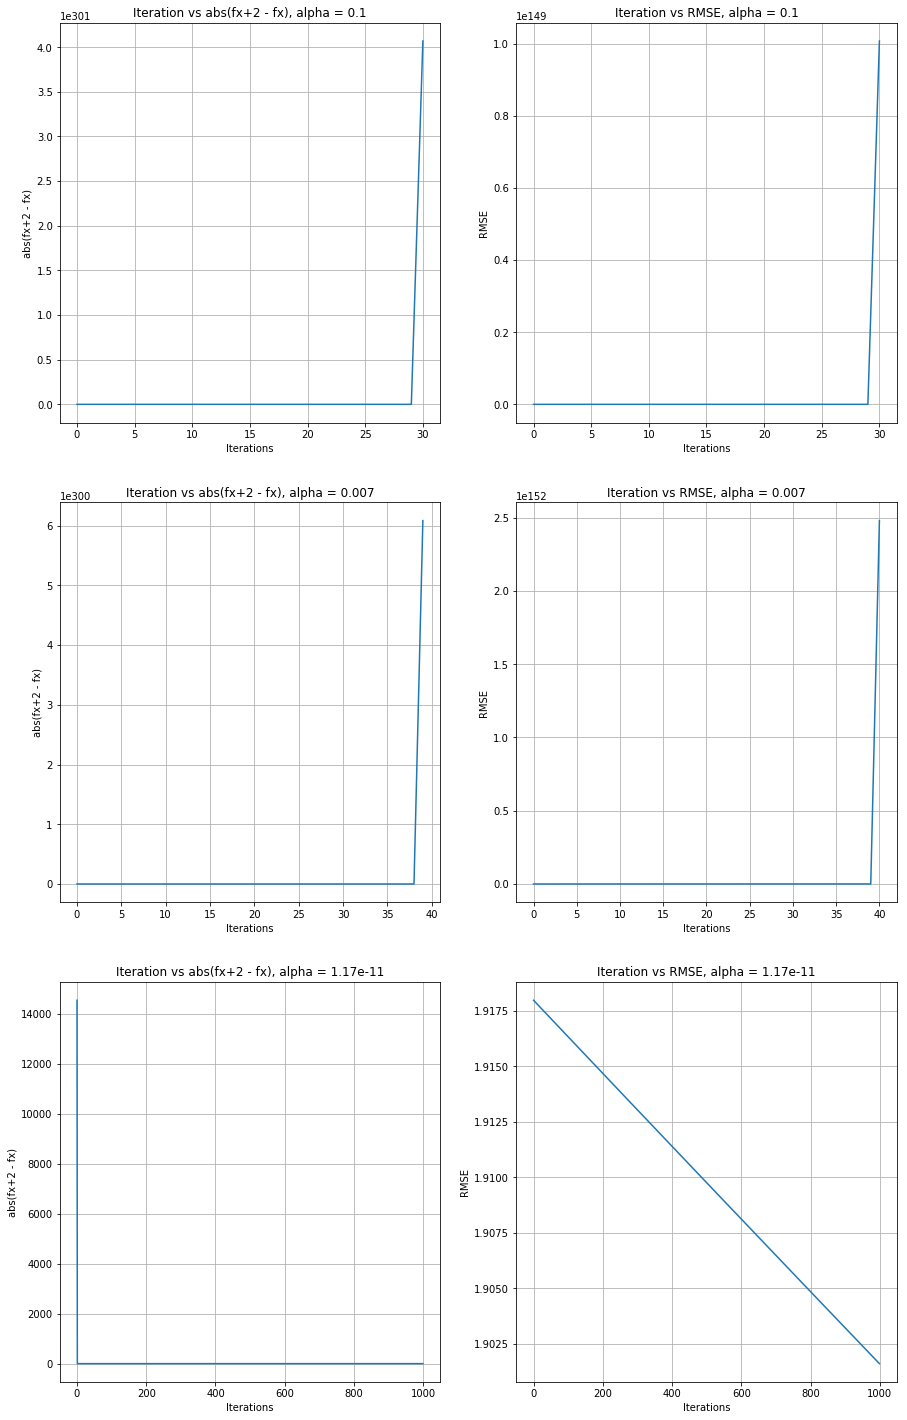

In [305]:
#Gradient descent with manual values for wine white dataset
X_train2 = trainSet2.as_matrix(columns = ['volatile acidity', 'chlorides', 'density', 'alcohol'])
X_test2 = testSet2.as_matrix(columns = ['volatile acidity', 'chlorides', 'density', 'alcohol'])
Y_train2 = trainSet2['quality']
Y_test2 = testSet2['quality']

np.random.seed(8)
inputBeta2 = np.random.random_sample(5)
alpha_parameterGrid2 = [0.1, 0.007, 1.17e-11]
figure, ((fig1, fig2), (fig3, fig4), (fig5, fig6))  = plt.subplots(3,2,figsize=(15, 25))
axis2 = ((fig1, fig2), (fig3, fig4), (fig5, fig6))
index2 = 0

bestModelParameters2 = None
bestModelX2 = None
bestModelY2 = None
leastRMSE2 = None
leastRSS2 = None
for alpha in alpha_parameterGrid2:
    print("When alpha =" +str(alpha))
    
    betas2, X2, Ydiff2, Yrmse2, rss2, rmse2 = learnlinregGD(X_train2, Y_train2, X_test2, Y_test2,
                                                                           alpha, inputBeta2,
                                                                           max_itr = 1000)
    if not(np.isnan(rmse2)):
        if leastRMSE2 is None or leastRMSE2 > rmse2:
            leastRMSE2 = rmse2
            bestModelParameters2 = betas2
            leastRSS2 = rss2
            bestModelX2 = X2
            bestModelY2 = Yrmse2
            
    print("RMSE "+ str(rmse2))
    
    axis2[index2][0].plot(X2, Ydiff2)
    axis2[index2][0].grid()
    axis2[index2][0].set_title("Iteration vs abs(fx+2 - fx), alpha = " + str(alpha))
    axis2[index2][0].set_xlabel("Iterations")
    axis2[index2][0].set_ylabel("abs(fx+2 - fx)")
    
    axis2[index2][1].plot(X2, Yrmse2)
    axis2[index2][1].grid()
    axis2[index2][1].set_title("Iteration vs RMSE, alpha = " + str(alpha))
    axis2[index2][1].set_xlabel("Iterations")
    axis2[index2][1].set_ylabel("RMSE")
    
    index2 = index2 + 1
    
plt.show()
plt.close()

Algorithm does not converge in 1000 interations
RMSE 0.6432857822165852


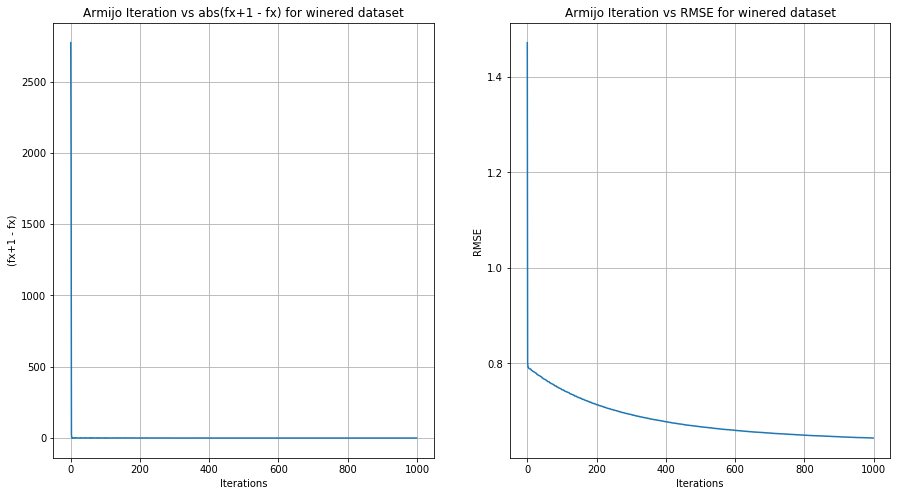

In [309]:
#Gradient descent with alpha values from ARMIJO wine red dataset
plt.close()
figure, ((fig1, fig2))  = plt.subplots(1,2,figsize=(15, 25))

betasArmijo1, xArmijo1, ydiffArmijo1, yRMSEArmijo1, rssArmijo1, rmseArmijo1 = learnlinregGD(X_train1, Y_train1, 
                                            X_test1, Y_test1,
                                            None, inputBeta1, max_itr = 1000,
                                            stepLengthController = steplength_armijo,
                                            stepLengthControllerParameters = {"delta":0.2})                    
                                            
                                                                        
figure.set_figheight(8)
print("RMSE "+ str(rmseArmijo1))
fig1.plot(xArmijo1, ydiffArmijo1)
fig1.grid()
fig1.set_title("Armijo Iteration vs abs(fx+1 - fx) for winered dataset")
fig1.set_xlabel("Iterations")
fig1.set_ylabel("(fx+1 - fx)")

fig2.plot(xArmijo1, yRMSEArmijo1)
fig2.grid()
fig2.set_title("Armijo Iteration vs RMSE for winered dataset")
fig2.set_xlabel("Iterations")
fig2.set_ylabel("RMSE")
plt.show()

Algorithm does not converge in 1000 interations
RMSE 0.7935611954054373


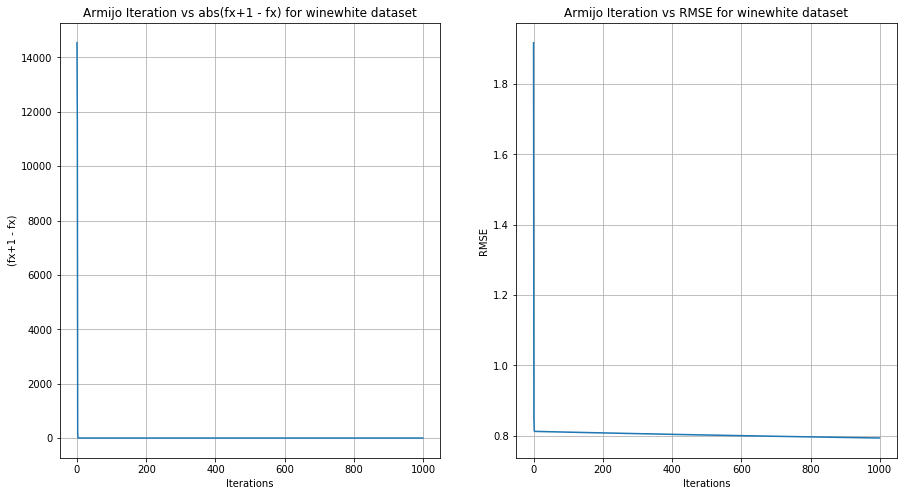

In [311]:
#Gradient descent with alpha values from ARMIJO wine white dataset
plt.close()
figure, ((fig1, fig2))  = plt.subplots(1,2,figsize=(15, 25))

betasArmijo2, xArmijo2, ydiffArmijo2, yRMSEArmijo2, rssArmijo2, rmseArmijo2 = learnlinregGD(X_train2, Y_train2, 
                                            X_test2, Y_test2,
                                            None, inputBeta2, max_itr = 1000,
                                            stepLengthController = steplength_armijo,
                                            stepLengthControllerParameters = {"delta":0.2})                    
                                            
                                                                        
figure.set_figheight(8)
print("RMSE "+ str(rmseArmijo2))
fig1.plot(xArmijo2, ydiffArmijo2)
fig1.grid()
fig1.set_title("Armijo Iteration vs abs(fx+1 - fx) for winewhite dataset")
fig1.set_xlabel("Iterations")
fig1.set_ylabel("(fx+1 - fx)")

fig2.plot(xArmijo2, yRMSEArmijo2)
fig2.grid()
fig2.set_title("Armijo Iteration vs RMSE for winewhite dataset")
fig2.set_xlabel("Iterations")
fig2.set_ylabel("RMSE")
plt.show()

Algorithm does not converge in 1000 interations
RMSE 0.6965284375039795


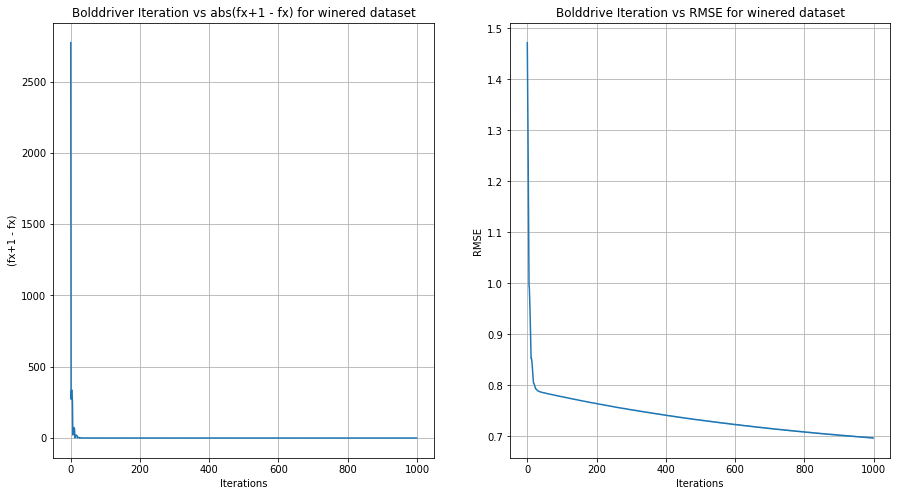

In [313]:
#Gradient descent with alpha values from BOLD Driver wine red dataset
figure, ((fig1, fig2))  = plt.subplots(1,2,figsize=(15, 25))


betasbd1, xbd1, ydiffbd1, yRMSEbd1, rssbd1, rmsebd1 = learnlinregGD(X_train1, Y_train1, 
                                                        X_test1, Y_test1,
                                                        1.0, inputBeta1, max_itr = 1000,
                                                        stepLengthController = steplength_bolddriver,
                                                        stepLengthControllerParameters = 
                                                        {"alphaMinus" : 0.9, "alphaPlus" : 1.5})
figure.set_figheight(8)
print("RMSE "+ str(rmsebd1))
fig1.plot(xbd1, ydiffbd1)
fig1.grid()
fig1.set_title("Bolddriver Iteration vs abs(fx+1 - fx) for winered dataset")
fig1.set_xlabel("Iterations")
fig1.set_ylabel("(fx+1 - fx)")

fig2.plot(xbd1, yRMSEbd1)
fig2.grid()
fig2.set_title("Bolddrive Iteration vs RMSE for winered dataset")
fig2.set_xlabel("Iterations")
fig2.set_ylabel("RMSE")

plt.show()

Algorithm does not converge in 1000 interations
RMSE 0.7944177582556085


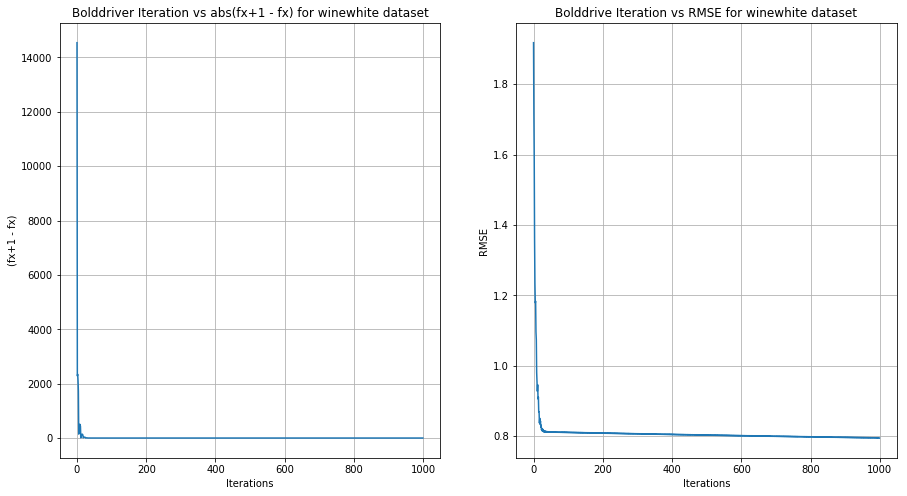

In [312]:
#Gradient descent with alpha values from BOLD Driver wine white dataset
figure, ((fig1, fig2))  = plt.subplots(1,2,figsize=(15, 25))


betasbd2, xbd2, ydiffbd2, yRMSEbd2, rssbd2, rmsebd2 = learnlinregGD(X_train2, Y_train2, 
                                                        X_test2, Y_test2,
                                                        1.0, inputBeta2, max_itr = 1000,
                                                        stepLengthController = steplength_bolddriver,
                                                        stepLengthControllerParameters = 
                                                        {"alphaMinus" : 0.9, "alphaPlus" : 1.5})
figure.set_figheight(8)
print("RMSE "+ str(rmsebd2))
fig1.plot(xbd2, ydiffbd2)
fig1.grid()
fig1.set_title("Bolddriver Iteration vs abs(fx+1 - fx) for winewhite dataset")
fig1.set_xlabel("Iterations")
fig1.set_ylabel("(fx+1 - fx)")

fig2.plot(xbd2, yRMSEbd2)
fig2.grid()
fig2.set_title("Bolddrive Iteration vs RMSE for winewhite dataset")
fig2.set_xlabel("Iterations")
fig2.set_ylabel("RMSE")

plt.show()

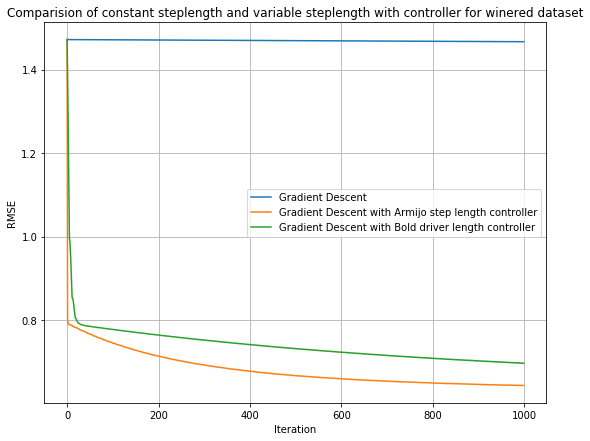

In [317]:
#Comparision of constant steplength and variable steplength with controller for winered dataset
plt.close()
plt.figure(figsize=(9,7))
plt.plot(bestModelX1, bestModelY1, label = "Gradient Descent")
plt.plot(xArmijo1, yRMSEArmijo1, label = "Gradient Descent with Armijo step length controller")
plt.plot(xbd1, yRMSEbd1, label = "Gradient Descent with Bold driver length controller")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Comparision of constant steplength and variable steplength with controller for winered dataset")
plt.legend()
plt.show()

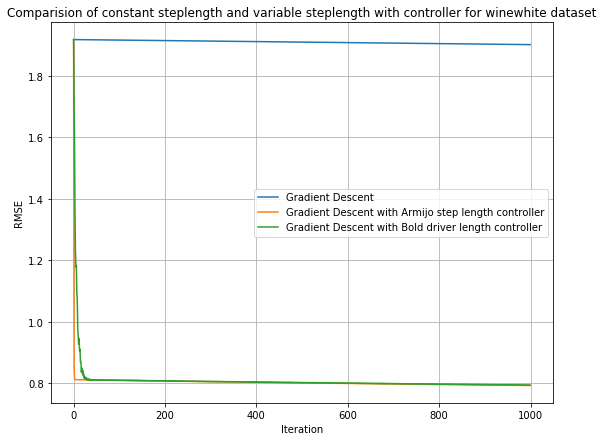

In [316]:
#Comparision of constant steplength and variable steplength with controller for winered dataset
plt.close()
plt.figure(figsize=(9,7))
plt.plot(bestModelX2, bestModelY2, label = "Gradient Descent")
plt.plot(xArmijo2, yRMSEArmijo2, label = "Gradient Descent with Armijo step length controller")
plt.plot(xbd2, yRMSEbd2, label = "Gradient Descent with Bold driver length controller")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Comparision of constant steplength and variable steplength with controller for winewhite dataset")
plt.legend()
plt.show()

In [296]:
#Prediction samples for all three datasets
yPrediction = Regression_Line(X_test,betas)
yPrediction1 = Regression_Line(X_test1,betas2)
yPrediction2 = Regression_Line(X_test2,betas2)
df1 = pd.DataFrame({"Air_Dataset_Actual":Y_test, "Air_Dataset_Prediction":yPrediction})
df2 = pd.DataFrame({"Winered_Dataset_Actual":Y_test1,"Winered_Dataset_Prediction":yPrediction1,})
df3 = pd.DataFrame({"Winewhite_Dataset_Actual":Y_test2, "Winewhite_Dataset_Prediction":yPrediction2})
df=pd.concat([df1[['Air_Dataset_Actual','Air_Dataset_Prediction']], 
                df2[['Winered_Dataset_Actual','Winered_Dataset_Prediction']],
                  df3[['Winewhite_Dataset_Actual','Winewhite_Dataset_Prediction']]], axis=1)
df.dropna()

,Air_Dataset_Actual,Air_Dataset_Prediction,Winered_Dataset_Actual,Winered_Dataset_Prediction,Winewhite_Dataset_Actual,Winewhite_Dataset_Prediction
597,231.52,177.225430,6.0,4.371153,6.0,4.242872
695,140.69,112.779825,6.0,4.885669,5.0,4.000467
